In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import mysql.connector as sqcon
import folium

### __Defining Functions__

In [2]:
# Defining the function to find missing data and createa dataframe output
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    return pd.concat([total,percent], axis=1, keys=['Total','Percent'])

# Definng the fucntion to plot data on map using lat and long
def plot_on_map(data_to_map):
    center =[data_to_map.iloc[0]['latitude'], data_to_map.iloc[0]['longitude']]
    map_India = folium.Map(location = center, zoom_start=4)
    for index, phone_loc in data_to_map.iterrows():
        location = [phone_loc['latitude'], phone_loc['longitude']]
        folium.Marker(location, popup = f'City:{phone_loc["city"]}').add_to(map_India)
        return map_India
    

### Assignment 1:
#### Reading and Understanding Data
- __Tasks__
- Load the datatables form csv file and sql table into the note book
- Read the data available
- Find the issues with data

### Reading data from MS SQL database

In [5]:
import mysql.connector
try:
    connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone1',
                                         user='student',
                                         password='student')

    sql_select_Query = "select * from gender_age_train"
    cursor = connection.cursor()
    cursor.execute(sql_select_Query)
    # get all records
    records = cursor.fetchall()
    print("Total number of rows in table: ", cursor.rowcount)
except mysql.connector.Error as e:
    print("Error reading data from MySQL table", e)
finally:
    if connection.is_connected():
        connection.close()
        cursor.close()
        print("MySQL connection is closed")

Total number of rows in table:  74645
MySQL connection is closed


In [6]:
user = pd.DataFrame(records)
user.tail(10)

,0,1,2,3
74635,1728576663562073800,M,38,M32-38
74636,8116314513428390753,M,25,M23-26
74637,-3539330294838027409,M,25,M23-26
74638,5645813107043557722,F,51,F43+
74639,-4752726726975186730,M,26,M23-26
74640,4682031842235089751,M,30,M29-31
74641,-9178703742877135986,M,30,M29-31
74642,180946546684162312,M,20,M22-
74643,1390702386071991851,M,37,M32-38
74644,89181010588227347,M,25,M23-26


In [9]:
user.reset_index()
user.columns=['device_id', 'gender','age','age_group']
user.head(5)

,device_id,gender,age,age_group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [10]:
import mysql.connector
try:
    connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone1',
                                         user='student',
                                         password='student')

    sql_select_Query = "select * from phone_brand_device_model"
    cursor = connection.cursor()
    cursor.execute(sql_select_Query)
    # get all records
    records1 = cursor.fetchall()
    print("Total number of rows in table: ", cursor.rowcount)
   
except mysql.connector.Error as e:
    print("Error reading data from MySQL table", e)
finally:
    if connection.is_connected():
        connection.close()
        cursor.close()
        print("MySQL connection is closed")

Total number of rows in table:  87726
MySQL connection is closed


In [11]:
device = pd.DataFrame(records1)
device.tail(10)

,0,1,2
87716,-2670392286357824533,vivo,X5SL
87717,8855678093786843415,三星,W2014
87718,-6036435451071138878,小米,MI 4
87719,-1242439729152442827,小米,红米2
87720,1174879451292807079,华为,P8 Lite
87721,-4961458925928574032,华为,荣耀畅玩4X
87722,-8819817317449262375,华为,荣耀6
87723,-3358291377416935026,华为,荣耀畅玩4
87724,3282788959750981633,小米,MI 2
87725,2491639413207286271,酷比,M1


In [12]:
device.reset_index()
device.columns=['device_id', 'brand','model']
device.head(5)

,device_id,brand,model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


### Reading from local file system
- Data given by INSAID in csv format
- File name : events_data.csv
- Firle location: File is stored in the same location as this notebook

In [13]:
# Reading events data from local storage
# Device ID is in exponential form and is converted to str
# Name Dataframe as 'event'

event =pd.read_csv('events_data.csv', dtype={'device_id':np.str})

## __Basic Analysis of all Data__

### User Data

In [14]:
user.head(5)

,device_id,gender,age,age_group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [15]:
user.shape

(74645, 4)

In [16]:
user.nunique()

device_id    74645
gender           2
age             85
age_group       12
dtype: int64

In [17]:
missing_data(user)

,Total,Percent
age_group,0,0.0
age,0,0.0
gender,0,0.0
device_id,0,0.0


In [18]:
user['age_group'].value_counts(sort=True)

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: age_group, dtype: int64

In [19]:
user['age'].unique()

array([35, 30, 24, 36, 38, 33, 31, 37, 28, 32, 48, 75, 39, 25, 27, 29, 34,
       22, 26, 47, 44, 21, 42, 64, 46, 23, 20, 41, 43, 51, 49, 53, 59, 45,
       50, 70, 67, 19, 52, 40, 63, 60, 61, 78, 56, 65, 58, 17, 16, 18, 71,
       54, 76, 62, 73, 66, 55, 57, 83, 84, 81, 80, 79, 77, 74, 13, 68, 89,
       87, 69, 88, 72, 82, 90, 96, 15,  1, 12, 14, 10, 85, 86, 11,  6, 94])

In [20]:
user[user['age'] < 10].count()

device_id    5
gender       5
age          5
age_group    5
dtype: int64

In [21]:
user[user['age'] < 10]

,device_id,gender,age,age_group
10385,3553057874282315257,M,1,M22-
60779,-8513863533705424532,M,6,M22-
60831,-5323874218045578676,M,6,M22-
60832,3646841514566479686,M,6,M22-
60833,5222152119137955379,M,6,M22-


#### __Observations on user data__
- There are __74645__ rows and __4__ columns in data.
- '# of unique devices are __74645__
- There are no missing data or null values
- Data types are in order

__Age_Group__
- Age group contains letters and numerals which are unnecesary considering gender is givern
- Grouping seems arbitary and of irregualr intervals
__Age__
- Age varies from 01 to 96
- There are __5__ users, one with age __01__ and four with __6__ as age.
- This may need further analysis

__Actions__
- Age group may be deleted and regrouped as per analysis planned
- Ages less than 10 may be considered errous entry and replaced with mode or even left as such to detect anomaly in use/sales.


### Device Data

In [22]:
device.head()

,device_id,brand,model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [23]:
device.shape

(87726, 3)

In [24]:
device.nunique()

device_id    87726
brand          116
model         1467
dtype: int64

In [25]:
missing_data(device)

,Total,Percent
model,0,0.0
brand,0,0.0
device_id,0,0.0


In [26]:
device['brand'].value_counts()

小米      21645
三星      19211
华为      15181
vivo     7596
OPPO     6717
        ...  
赛博宇华        1
MIL         1
丰米          1
世纪星         1
凯利通         1
Name: brand, Length: 116, dtype: int64

#### __Observations on device data__
- There are __87726__ rows and __3__ columns in data.
- '# of unique devices are __87726__
- There are no missing data or null values
- Data types are in order

__Brand__

- There are __1467__ brands 
- Most brand names are in Chineese language

__Model__

- Model seems insignificant at this stage

__Actions__

- Convert brand names in Chineese to English language
- Drop column 'model'



### Event Data

In [27]:
event.head(5)

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2973347786994914304,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4734221357723754978,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3264499652692492784,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5731369272434022440,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,338888002570799963,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [28]:
event.shape

(3252950, 7)

In [29]:
event.nunique()

event_id     3252950
device_id      60865
timestamp     588126
longitude      60095
latitude       60185
city             933
state             32
dtype: int64

In [30]:
missing_data(event)

,Total,Percent
device_id,453,0.013926
latitude,423,0.013004
longitude,423,0.013004
state,377,0.011589
city,0,0.000000
timestamp,0,0.000000
event_id,0,0.000000


#### Analysis of missing data based on city
- City has no missing values, its prudent to analyse missing data with respect to city

In [31]:
event[event['latitude'].isnull()]['city'].value_counts()

Jaipur           66
Pune             63
Visakhapatnam    63
Indore           63
Delhi            63
Chennai          63
Araria           14
Moga             14
Bagaha           14
Name: city, dtype: int64

In [32]:
event[event['longitude'].isnull()]['city'].value_counts()

Jaipur           66
Pune             63
Visakhapatnam    63
Indore           63
Delhi            63
Chennai          63
Araria           14
Moga             14
Bagaha           14
Name: city, dtype: int64

In [33]:
event[event['state'].isnull()]['city'].value_counts()

Delhi            64
Pune             63
Indore           51
Jaipur           49
Visakhapatnam    47
Chennai          47
Gangarampur      26
Arambagh         16
Channapatna      14
Name: city, dtype: int64

#### Observation on event data
- Contains __3252950__ rows and __7__ columns
- Data gives the time and location based on city, state and lat/long refrence of the event
- There are __60865__ devices that has created these events
- Events are recorded from __933__ cities across __32__ states of India

####  __That is there are _3252950_ events created using _87726_ devices by _74645_ users__

__Missing Data__
- Device_Id : __453__
- Lat/long  : __423__
- State     : __377__

__Lat/Long__
- Both lat and long are missing from same rows
- 09 cities account for all missing lat/long

__State__
- 09 cities account for of all missing states
- They are not same as missing lat/long

__Actions__
- __Device_id__ is the common point in all three data sets
- Missing data in both states and lat/long can be filled using city
- Mode of the lat/long for the cities where data is missing can be used fo the same.
- The tables may be mereged to form a single dataframe for further analysis based on device data.


### Finding common unique id in all three tables
__This can be done using two ways__

   - By creating merged datasets
   - By code finding intersection of values


#### Method 1: By merging datasets

In [35]:
# Merging device and user table to include all rows
device_user_outer = pd.merge(device, user, how ='outer')

In [36]:
device_user_outer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87754 entries, 0 to 87753
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   device_id  87754 non-null  int64  
 1   brand      87726 non-null  object 
 2   model      87726 non-null  object 
 3   gender     74645 non-null  object 
 4   age        74645 non-null  float64
 5   age_group  74645 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.7+ MB


In [37]:
# Merging device and user data on device id of all devices
device_user = pd.merge(device, user, how ='left', on = 'device_id')

In [38]:
device_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87726 entries, 0 to 87725
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   device_id  87726 non-null  int64  
 1   brand      87726 non-null  object 
 2   model      87726 non-null  object 
 3   gender     74617 non-null  object 
 4   age        74617 non-null  float64
 5   age_group  74617 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.7+ MB


#### Method 2 : By code using intersection of values
- Create sets of device id
    - user_set
    - device_set
    - event_set
- Find the intersection of these sets to get common values

In [39]:
# Creating the sets

user_set   = set(user['device_id'].astype(str).unique())
device_set = set(device['device_id'].astype(str).unique())
event_set  = set(event['device_id'].astype(str).unique())

# finding the intersection of above sets using code

user_device_set = user_set.intersection(device_set)
common_device_set = event_set.intersection(user_device_set)


In [40]:
print("Gender Age count : {0}\nPhone Brand Count : {1}\nEvents Device Count : {2}".format(len(user_set), len(device_set), len(event_set)))
print("Common devices between Gender Age and Phone Brand Datasets is : ", len(user_device_set))
print("Common devices between all 3 Datasets is : ", len(common_device_set))

Gender Age count : 74645
Phone Brand Count : 87726
Events Device Count : 60866
Common devices between Gender Age and Phone Brand Datasets is :  74617
Common devices between all 3 Datasets is :  60865


### Observation on Common Device ID
__Common Device ID__
- Since device id is common in all three tables, find the common 
device ids present
 - Between __user__ and __device__ : 74617
 - Between all datasets.           : 60866

## Assignment for Week 2

### Tasks

#### Preprocessing of Data
- Rectify the issues as observed in week one
- Create a single data set
- Analyse and update further observations

### Convert model names in Chineese into English

__Method Followed__
- Copy the brand names to google translator and find English names.
- Create a dataframe with both Chineese and English Names.
- Merge this dataframe to the exisiting device dataframe using brand name.
- Drop coloum with Chineese name and rename the brand name column head to 'brand'

In [41]:
device['brand'].unique()

array(['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'], dtype=object)

In [42]:
# Since google translation API was giving issues with large datasets,
# The unique brand names were translated extrenally and then copied into 
# notebook to create a dictionary.

brand_list={'brand':['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'], 
    'brand_eng':['vivo','Xiaomi','OPPO','Samsung','Coolpad','Lenovo','Huawei','Qiku','Meizu','Phicom',
       'China Mobile','HTC','Tianyu','Extreme Bao','LG','Oberxin','Yumi','ZUK','Nubia','HP',
       'Nibiru','Meitu','Xiangmi','Motorola','Mengmi','Hammer','InFocus','LeTV','Hisense','Bai Li Feng',
       'OnePlus','Yuxin','Haier','Cubbie','Newman','Bird','Dove','Lingyun','TCL','Copper','Aipel ',
       'LOGO','green onion','fruit rice','ASUS','Onda','Aiyouni','Konka','Yougo','Banghua','Cyber ​​Yuhua',
       'Black Rice','Lovme','Pioneer','E School','Shenzhou','Nokia','Pnair','Candy Gourd','Yitong','Ouxin',
       'Mickey','Cubbie Rubik','Blue Devils','Little Poplar','Bairfeng','Nuomi','Mi Song','E People E Book','Simi','Big Q' ,
       'Taipower','Philips','Weimi','Daxian','Changhong','Vitu','Green Orange','Originally','Xia Mi','Amoi','Wei Mi',
       'Bajia','SUGAR','Ouqi','Century Star','Zhimei','Obi','Kivu','Femtosecond','Desai','Yipai',
       'Google','Venus Digital','Guangxin','Noah Xin','MIL','White Rice','Coke','Baojiexun','Youyu','Shouyun',
       'Rimei','Rigao','Wopfung','Mole','Fresh Rice','Kailyton','Weibi','Ouwo','Fengmi','Hengyufeng ',
       'Ox','Siemens','Orlandi','PPTV']}
brand_df=pd.DataFrame.from_dict(brand_list)
brand_df

,brand,brand_eng
0,vivo,vivo
1,小米,Xiaomi
2,OPPO,OPPO
3,三星,Samsung
4,酷派,Coolpad
...,...,...
111,恒宇丰,Hengyufeng
112,奥克斯,Ox
113,西门子,Siemens
114,欧乐迪,Orlandi


In [43]:
device = pd.merge(device,brand_df,how='left',on='brand')
device.head(3)

,device_id,brand,model,brand_eng
0,1877775838486905855,vivo,Y13,vivo
1,-3766087376657242966,小米,V183,Xiaomi
2,-6238937574958215831,OPPO,R7s,OPPO


In [44]:
# For the time being, only brand is being changed to English and model column is dropped
# However, the model colum may be changed in a similar manner
device.drop('brand',axis=1,inplace=True)

In [45]:
device.drop('model',axis=1,inplace=True)

In [46]:
device.rename(columns={'brand_eng':'brand'}, inplace = True)

In [47]:
device.head()

,device_id,brand
0,1877775838486905855,vivo
1,-3766087376657242966,Xiaomi
2,-6238937574958215831,OPPO
3,8973197758510677470,Samsung
4,-2015528097870762664,Xiaomi


### Replacing Missing Values in event dataset
- __City__ is considered as the anchor for filling missing values in lat/long and state

### Replacing Latitude/Longitude

In [48]:
# Create a list of cities where lat/long is missing

missing_location_list = event[event.latitude.isnull()]['city'].unique()

In [49]:
print(missing_location_list)

['Delhi' 'Indore' 'Visakhapatnam' 'Chennai' 'Pune' 'Jaipur' 'Araria'
 'Moga' 'Bagaha']


In [50]:
# Create a dictionary of city and modes of lat and long

location_dict = {}

for city in missing_location_list:
    mode_latitude  = (event.loc[event['city']== city]['latitude']).mode()[0]
    mode_longitude = (event.loc[event['city']== city]['longitude']).mode()[0]
    location_dict[city]  = [mode_latitude, mode_longitude]
print(location_dict)

{'Delhi': [28.749820000000003, 77.29399099999998], 'Indore': [22.809817000000002, 75.89546299999998], 'Visakhapatnam': [17.829748000000006, 83.326714], 'Chennai': [13.128174, 80.359796], 'Pune': [18.616127, 73.926254], 'Jaipur': [26.949746, 75.89405699999998], 'Araria': [26.211919, 87.570736], 'Moga': [30.904178, 75.268748], 'Bagaha': [27.17739700000001, 84.1409]}


In [51]:
# Filling the missing values

for city in location_dict:
    event.loc[((event['city']== city) & (event['latitude'].isnull())), 'latitude'] = float(location_dict[city][0])
    event.loc[((event['city']== city) & (event['longitude'].isnull())),'longitude'] = float(location_dict[city][1])

### Replacing State

In [52]:
# Create a list of missing State

missing_state_list = event[event['state'].isnull()]['city'].unique()

In [53]:
print(missing_state_list)

['Pune' 'Visakhapatnam' 'Indore' 'Chennai' 'Delhi' 'Channapatna' 'Jaipur'
 'Gangarampur' 'Arambagh']


In [54]:
# Create a dictionary of missing state mapped to city

missing_state_dict = {}

for city in missing_state_list:
    missing_state_dict[city] = (event.loc[(event['city'] == city) & (~event['state'].isnull())]['state']).reset_index(drop=True)[0]
    
print(missing_state_dict)

{'Pune': 'Maharashtra', 'Visakhapatnam': 'AndhraPradesh', 'Indore': 'MadhyaPradesh', 'Chennai': 'TamilNadu', 'Delhi': 'Delhi', 'Channapatna': 'Karnataka', 'Jaipur': 'Rajasthan', 'Gangarampur': 'WestBengal', 'Arambagh': 'WestBengal'}


In [55]:
# Updating the missing state list

for city in missing_state_dict:
    event.loc[((event['city'] == city) & (event['state'].isnull())), 'state'] = str(missing_state_dict[city])
    #event.loc[((event['city'] == city) & (event['state'].isnull())), 'state'] = str(city_state_dict[city])

### Replacing the missing device_ids

- Since devices_ids can be traced using lat/long, combining them to a single column will help 
- Therefore, create a temp column containing both lat and long
- Use the mode of location for the missing device_id to fill the missing dvice_id

In [75]:
# Creating new col 'joint_loc'

event['joint_loc']= [''.join([str(x), '-', str(y)]) for x, y in zip(event['latitude'],event['longitude'])]

In [76]:
event.head(3)

,event_id,device_id,timestamp,longitude,latitude,city,state,joint_loc
0,2765368,2973347786994914304,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,28.73014-77.22567599999998
1,2955066,4734221357723754978,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,22.660325-88.388361
2,605968,-3264499652692492784,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,28.757906-77.25680899999998


In [79]:
missing_data(event)

,Total,Percent
device_id,430,0.013219
joint_loc,0,0.000000
state,0,0.000000
city,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
timestamp,0,0.000000
event_id,0,0.000000


In [77]:
event.nunique()

event_id     3252950
device_id      60865
timestamp     588126
longitude      60095
latitude       60185
city             933
state             32
joint_loc      60869
dtype: int64

In [80]:
# Create Missing device list
missing_device_list = event[event['device_id'].isnull()]['joint_loc'].unique()

In [81]:
print(missing_device_list)

['22.814519-75.88295600000002' '26.948689-75.888487' '26.960796-75.846007'
 '22.777781-75.92333199999999' '31.561746999999997-75.99255099999998'
 '18.628057-73.862756' '18.566925-73.86016500000002' '17.805195-83.357991'
 '28.719966000000003-77.29248100000002' '18.614812-73.92649899999998'
 '13.153332-80.34361299999998' '13.149176-80.30927199999998'
 '28.721053-77.27481399999998' '17.752819-83.371738' '22.817526-75.95805'
 '17.822906-83.342711' '26.95399-75.836167' '13.189053-80.33543499999998'
 '21.194283-73.16934499999998' '21.790693-70.686387']


In [85]:
# Create a dictionary of lat_long and device id

device_id_location_dict = {}

for l in missing_device_list:
    device_id_location_dict[l] = (event[event['joint_loc'] == location]['device_id'].mode()[0])

print(device_id_location_dict)

{'22.814519-75.88295600000002': '3132861355949762783', '26.948689-75.888487': '3132861355949762783', '26.960796-75.846007': '3132861355949762783', '22.777781-75.92333199999999': '3132861355949762783', '31.561746999999997-75.99255099999998': '3132861355949762783', '18.628057-73.862756': '3132861355949762783', '18.566925-73.86016500000002': '3132861355949762783', '17.805195-83.357991': '3132861355949762783', '28.719966000000003-77.29248100000002': '3132861355949762783', '18.614812-73.92649899999998': '3132861355949762783', '13.153332-80.34361299999998': '3132861355949762783', '13.149176-80.30927199999998': '3132861355949762783', '28.721053-77.27481399999998': '3132861355949762783', '17.752819-83.371738': '3132861355949762783', '22.817526-75.95805': '3132861355949762783', '17.822906-83.342711': '3132861355949762783', '26.95399-75.836167': '3132861355949762783', '13.189053-80.33543499999998': '3132861355949762783', '21.194283-73.16934499999998': '3132861355949762783', '21.790693-70.686387'

In [87]:
# Update the missing values in device_id
for l in device_id_location_dict:
   
    event.loc[((event['joint_loc'] == l) & (event['device_id'].isnull())), 'device_id'] = str(device_id_location_dict[l])

In [89]:
event.drop('joint_loc', axis =1, inplace =True)

In [90]:
missing_data(event)

,Total,Percent
state,0,0.0
city,0,0.0
latitude,0,0.0
longitude,0,0.0
timestamp,0,0.0
device_id,0,0.0
event_id,0,0.0


## Creating Combined data set of all three datasets

In [91]:
user['device_id']=user['device_id'].astype(str)

In [92]:
event_user = pd.merge(event, user, how = 'left', on = 'device_id')

In [93]:
event_user.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,age_group
0,2765368,2973347786994914304,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,M,35,M32-38
1,2955066,4734221357723754978,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,M,30,M29-31
2,605968,-3264499652692492784,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,M,24,M23-26
3,448114,5731369272434022440,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,M,26,M23-26
4,665740,338888002570799963,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,M,30,M29-31


In [94]:
event_user.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   event_id   3252950 non-null  int64  
 1   device_id  3252950 non-null  object 
 2   timestamp  3252950 non-null  object 
 3   longitude  3252950 non-null  float64
 4   latitude   3252950 non-null  float64
 5   city       3252950 non-null  object 
 6   state      3252950 non-null  object 
 7   gender     3252950 non-null  object 
 8   age        3252950 non-null  int64  
 9   age_group  3252950 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 273.0+ MB


In [96]:
missing_data(event_user)

,Total,Percent
age_group,0,0.0
age,0,0.0
gender,0,0.0
state,0,0.0
city,0,0.0
latitude,0,0.0
longitude,0,0.0
timestamp,0,0.0
device_id,0,0.0
event_id,0,0.0


In [97]:
event_user.nunique()

event_id     3252950
device_id      60865
timestamp     588126
longitude      60095
latitude       60185
city             933
state             32
gender             2
age               85
age_group         12
dtype: int64

In [98]:
device['device_id']=device['device_id'].astype(str)

In [99]:
data = pd.merge(event_user, device, how = 'left', left_on = 'device_id', right_on='device_id')

In [100]:
data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,age_group,brand
0,2765368,2973347786994914304,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,M,35,M32-38,Yumi
1,2955066,4734221357723754978,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,M,30,M29-31,vivo
2,605968,-3264499652692492784,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,M,24,M23-26,Xiaomi
3,448114,5731369272434022440,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,M,26,M23-26,HTC
4,665740,338888002570799963,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,M,30,M29-31,Xiaomi


In [101]:
data.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   event_id   3252950 non-null  int64  
 1   device_id  3252950 non-null  object 
 2   timestamp  3252950 non-null  object 
 3   longitude  3252950 non-null  float64
 4   latitude   3252950 non-null  float64
 5   city       3252950 non-null  object 
 6   state      3252950 non-null  object 
 7   gender     3252950 non-null  object 
 8   age        3252950 non-null  int64  
 9   age_group  3252950 non-null  object 
 10  brand      3252950 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 297.8+ MB


In [102]:
missing_data(data)

,Total,Percent
brand,0,0.0
age_group,0,0.0
age,0,0.0
gender,0,0.0
state,0,0.0
city,0,0.0
latitude,0,0.0
longitude,0,0.0
timestamp,0,0.0
device_id,0,0.0


In [103]:
data.nunique()

event_id     3252950
device_id      60865
timestamp     588126
longitude      60095
latitude       60185
city             933
state             32
gender             2
age               85
age_group         12
brand            105
dtype: int64

## Selection of states as per INSAID Directive

In [104]:
state_list = ['AndhraPradesh', 'Pondicherry', 'Mizoram', 'AndamanandNicobarIslands', 'Meghalaya', 'HimachalPradesh']

In [105]:
def state_selection(state_list):
    state_series = data.state.isin(state_list)
    state_data = data[state_series]
    state_data = state_data.reset_index(drop=True)
    return state_data

In [106]:
data_s = state_selection(state_list)

In [107]:
data_s.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,age_group,brand
0,1078723,-512424213979236423,2016-05-02 02:21:20,83.398244,17.768149,Visakhapatnam,AndhraPradesh,M,31,M29-31,Xiaomi
1,280014,-8879643774076165575,2016-05-05 13:06:01,78.155397,16.390327,Wanparti,AndhraPradesh,M,34,M32-38,Samsung
2,2334601,-601883305299256779,2016-05-05 11:17:48,83.380111,17.828583,Visakhapatnam,AndhraPradesh,M,30,M29-31,Huawei
3,2064864,-2764520535330416860,2016-05-03 23:58:20,83.315014,17.825280,Visakhapatnam,AndhraPradesh,F,27,F27-28,Meizu
4,1341801,4986891477794016217,2016-05-07 15:24:58,83.324339,17.778384,Visakhapatnam,AndhraPradesh,M,43,M39+,Xiaomi


In [108]:
missing_data(data_s)

,Total,Percent
brand,0,0.0
age_group,0,0.0
age,0,0.0
gender,0,0.0
state,0,0.0
city,0,0.0
latitude,0,0.0
longitude,0,0.0
timestamp,0,0.0
device_id,0,0.0


In [109]:
data_s.nunique()

event_id     329172
device_id      5224
timestamp    240679
longitude      5203
latitude       5210
city            113
state             6
gender            2
age              72
age_group        12
brand            69
dtype: int64

In [110]:
data_s[data_s['age'] < 10]

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,age_group,brand
31019,1851692,3553057874282315257,2016-05-05 11:10:57,80.030483,17.011561,Kodar,AndhraPradesh,M,1,M22-,Meizu
38877,495898,3553057874282315257,2016-05-01 07:14:22,80.030483,17.011561,Kodar,AndhraPradesh,M,1,M22-,Meizu
119117,2801541,3553057874282315257,2016-05-05 10:07:39,80.030483,17.011561,Kodar,AndhraPradesh,M,1,M22-,Meizu
130088,3222764,3553057874282315257,2016-05-05 04:19:42,80.030483,17.011561,Kodar,AndhraPradesh,M,1,M22-,Meizu
171334,3058156,3553057874282315257,2016-05-02 09:48:32,80.030483,17.011561,Kodar,AndhraPradesh,M,1,M22-,Meizu
243366,2966674,3553057874282315257,2016-05-05 07:39:04,80.030483,17.011561,Kodar,AndhraPradesh,M,1,M22-,Meizu
251789,3240766,3553057874282315257,2016-05-01 17:56:59,80.030483,17.011561,Kodar,AndhraPradesh,M,1,M22-,Meizu
273010,2097978,3553057874282315257,2016-05-04 15:15:13,80.030483,17.011561,Kodar,AndhraPradesh,M,1,M22-,Meizu
301188,2452646,3553057874282315257,2016-05-02 13:27:57,80.030483,17.011561,Kodar,AndhraPradesh,M,1,M22-,Meizu
315619,1822847,3553057874282315257,2016-05-05 09:32:43,80.030483,17.011561,Kodar,AndhraPradesh,M,1,M22-,Meizu


In [111]:
state_list =['Mizoram']
state_mz = state_selection(state_list)

In [112]:
state_list =['Meghalaya']
state_ml = state_selection(state_list)

In [113]:
state_list =['Pondicherry']
state_py = state_selection(state_list)

In [114]:
state_list =['AndhraPradesh']
state_ap = state_selection(state_list)

In [115]:
state_list =['HimachalPradesh']
state_hp = state_selection(state_list)

In [116]:
state_list =['AndamanandNicobarIslands']
state_an = state_selection(state_list)

# EDA

### Task for Week 3:

### Do an Analysis of the preprocessed data.

- __Here are the points about how Analysis should be done:__

    - 1. Distribution of Users(device_id) across States.

    - 2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).

    - 3. Distribution of Users across Gender.

    - 4. Distribution of Users across Age Segments.

    - 5. Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.

    - 6. Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands).

    - 7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands).

    - 8. Hourly distribution of Phone Calls.

    - 9. Plot the Users on the Map using any suitable package.
##### Note: While doing analysis for the above points 1 - 7, consider only one instance of a particular User(device_id) as a User can do multiple phone calls and considering every instance of the same User can give misleading numbers.



In [117]:
import seaborn as sns
import matplotlib.pyplot as plt


In [118]:
age_bins = [0,10,20,30,40,50,60,70,80,100]
age_labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-100']
data_s['age_group'] = pd.cut(data_s['age'], bins=age_bins,labels=age_labels,include_lowest=True)
data_s.tail(5)

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,age_group,brand
329167,2486328,-2943654502660526410,2016-05-03 19:09:18,83.371765,17.800655,Visakhapatnam,AndhraPradesh,F,44,40-50,Samsung
329168,2905298,5141558079485933812,2016-05-04 10:16:36,83.339048,17.751325,Visakhapatnam,AndhraPradesh,M,25,20-30,vivo
329169,2264739,-3616571650391600530,2016-05-07 12:45:06,83.945946,18.336945,Srikakulam,AndhraPradesh,F,26,20-30,Huawei
329170,1045746,-1370786394444893411,2016-05-01 00:15:22,91.911920,25.642058,Shillong,Meghalaya,M,40,30-40,Lenovo
329171,381262,-2920741109167081271,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh,M,30,20-30,Xiaomi


In [119]:
data_s['state'] = data_s['state'].replace({'AndhraPradesh':'AP', 'HimachalPradesh':'HP', 'Mizoram':'MZ','Meghalaya':'ML','Pondicherry':'PY', 'AndamanandNicobarIslands':'AN'},regex = True)

In [120]:
data_s['state'].unique()

array(['AP', 'MZ', 'PY', 'ML', 'HP', 'AN'], dtype=object)

#### Distribution of Users(device_id) across States.

In [287]:
df = pd.DataFrame(data_s.groupby(['state'])['device_id'].count())
df['percentage'] = data_s.groupby(['state'])['device_id'].count()/len(data_s)*100
df.rename(columns={'device_id' :'device_count'}, inplace =True)
df.reset_index()

,state,device_count,percentage
0,AN,1515,0.460246
1,AP,321379,97.632545
2,HP,1409,0.428044
3,ML,1515,0.460246
4,MZ,1613,0.490017
5,PY,1741,0.528903


In [307]:
def state_distribution(state):
    df = pd.DataFrame(state.groupby(['city'])['device_id'].count())
    df['percentage'] = state.groupby(['city'])['device_id'].count()/len(state)*100
    
    df.rename(columns={'device_id' :'device_count'}, inplace =True)
    df1 = df.reset_index()
    return df1

In [308]:
city_count_an = state_distribution(state_an)
city_count_an

,city,device_count,percentage
0,PortBlair,1515,100.0


In [309]:
city_count_ap = state_distribution(state_ap)
city_count_ap =city_count_ap.sort_values(by = 'percentage', ascending=False)
city_count_ap

,city,device_count,percentage
98,Visakhapatnam,235772,73.362603
10,Bodhan,1539,0.478874
79,Sattenapalle,1521,0.473273
39,Kodar,1488,0.463005
76,Rayadrug,1482,0.461138
...,...,...,...
16,Dharmavaram,426,0.132554
71,Rajampet,397,0.123530
85,Srikalahasti,372,0.115751
73,Ramachandrapuram,279,0.086813


In [310]:
city_count_hp = state_distribution(state_hp)
city_count_hp =city_count_hp.sort_values(by = 'percentage', ascending=False)
city_count_hp

,city,device_count,percentage
0,Shimla,1409,100.0


In [311]:
city_count_mz = state_distribution(state_mz)
city_count_mz =city_count_mz.sort_values(by = 'percentage', ascending=False)
city_count_mz

,city,device_count,percentage
0,Aizawl,1192,73.899566
1,Lunglei,421,26.100434


In [313]:
city_count_ml = state_distribution(state_ml)
city_count_ml =city_count_ml.sort_values(by = 'percentage', ascending=False)
city_count_ml

,city,device_count,percentage
0,Shillong,919,60.660066
1,Tura,596,39.339934


In [314]:
city_count_py = state_distribution(state_py)
city_count_py =city_count_py.sort_values(by = 'percentage', ascending=False)
city_count_py

,city,device_count,percentage
0,Karaikal,811,46.582424
2,Pondicherry,516,29.638139
1,Ozhukarai,414,23.779437


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='city', ylabel='Density'>

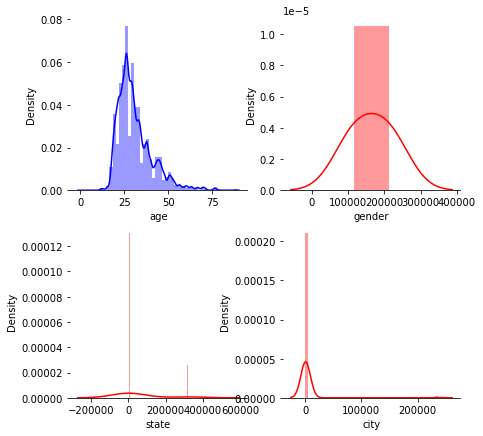

In [315]:
f, ax = plt.subplots(2, 2, figsize=(7, 7), sharex=False) 
sns.despine(left=True)

sns.distplot(data_s.age, color="b", ax =ax[0,0])
sns.distplot(data_s.gender.value_counts(), color="r",ax =ax[0,1])
sns.distplot(data_s.state.value_counts(), color="r",ax =ax[1,0])
sns.distplot(data_s.city.value_counts(), color="r",ax =ax[1,1])

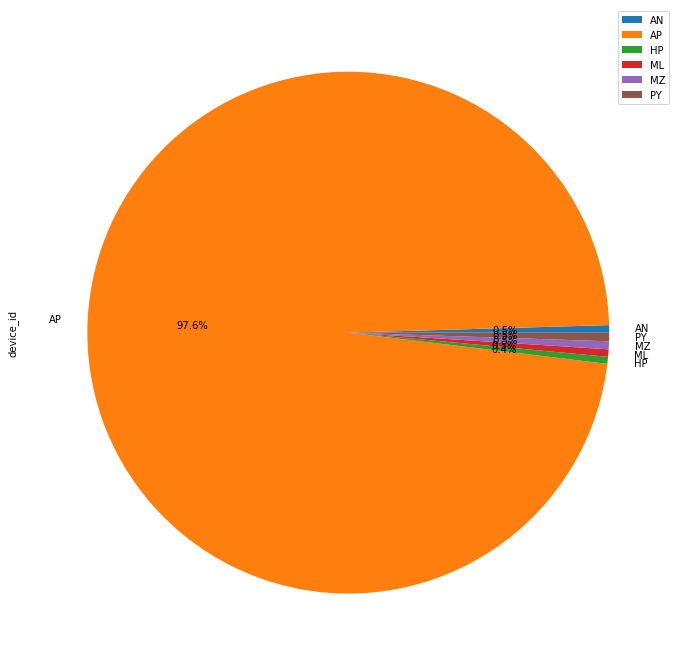

In [336]:
f,ax = plt.subplots(figsize=(15,12));
data_s.groupby(['state'])['device_id'].count().plot(kind='pie', autopct='%1.1f%%',legend = True,);

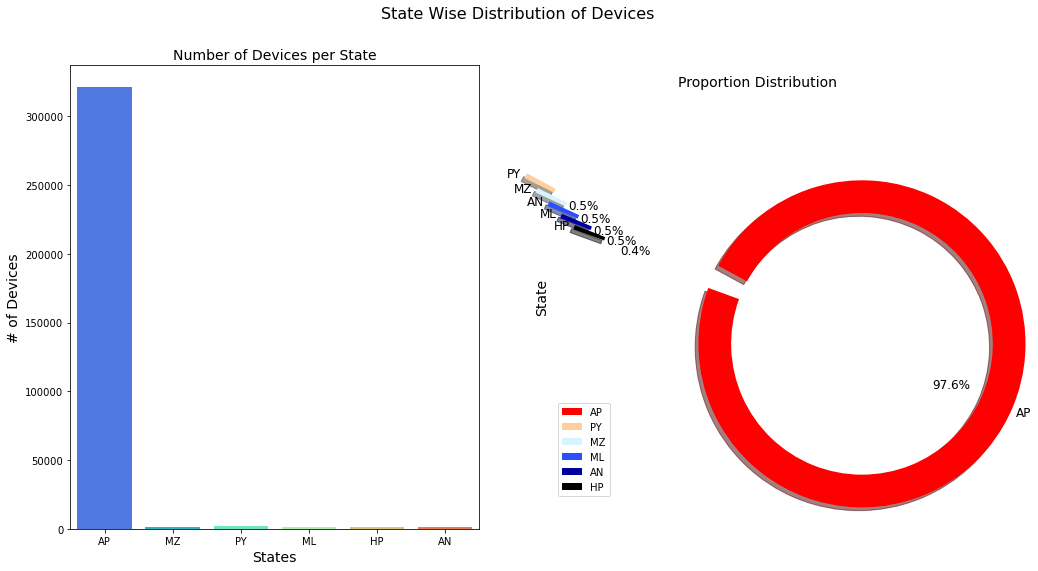

In [337]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.countplot(x = 'state', data = data_s, palette = 'rainbow')
plt.xlabel(xlabel = 'States', size = 14)
plt.ylabel(ylabel = '# of Devices', size = 14)
plt.title(label = 'Number of Devices per State', size = 14)

plt.subplot(1, 2, 2)
space =[.70,.6,.50,.40,.30,.20]
data_s['state'].value_counts().plot(kind = 'pie', fontsize = 12, explode=space, autopct = '%3.1f%%', labeldistance=1.03,wedgeprops = dict(width=.20), 
                                       shadow =True, startangle = 160, figsize = [15, 8], legend = True, cmap = 'flag')
plt.legend(['AP', 'PY','MZ','ML','AN','HP'])
plt.ylabel(ylabel = 'State', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'State Wise Distribution of Devices', y = 1.02, size = 16)
plt.show()

Text(0, 0.5, '# of Devices')

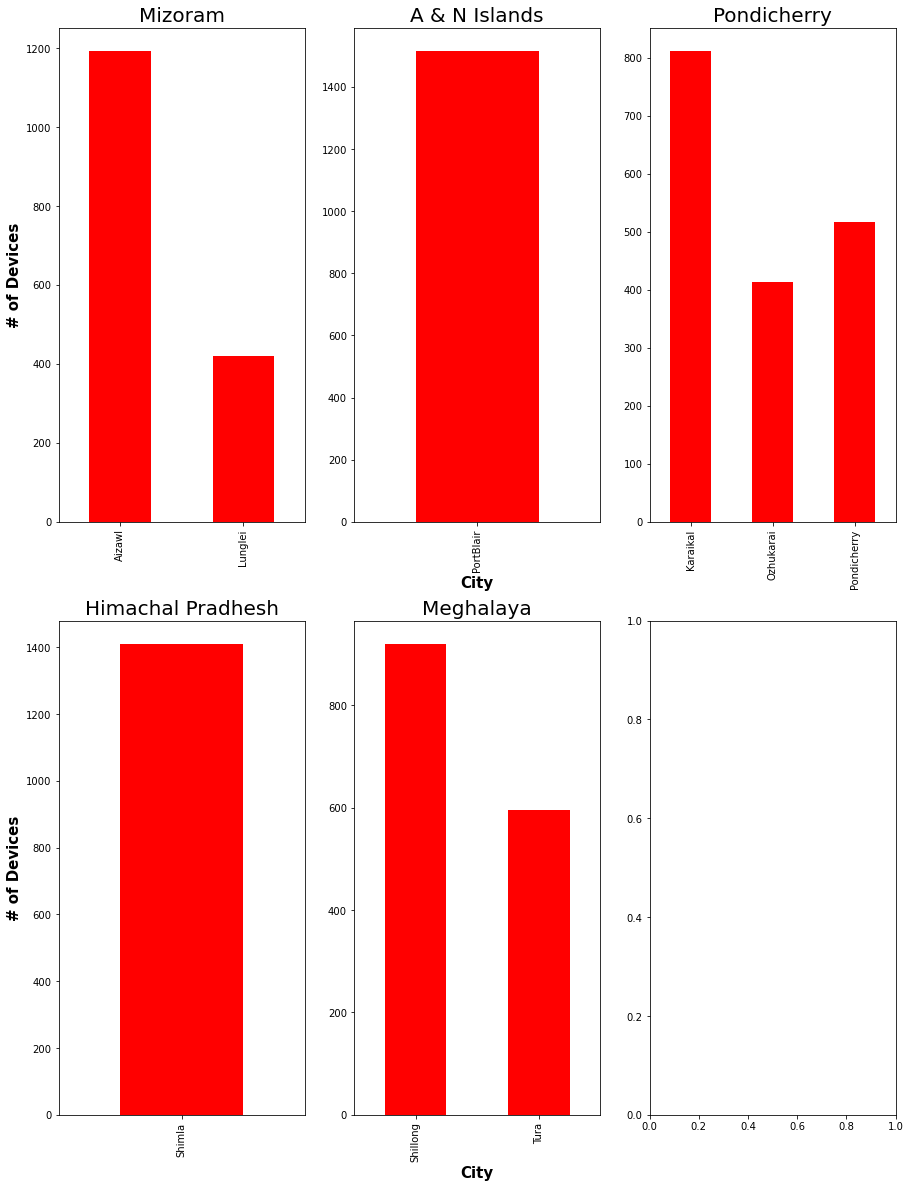

In [338]:
f,ax = plt.subplots(2,3,figsize=(15,20));
state_mz.groupby(['city'])['device_id'].count().plot(kind='bar',ax=ax[0,0], cmap='autumn');
state_hp.groupby(['city'])['device_id'].count().plot(kind='bar',ax=ax[1,0], cmap='autumn');
state_an.groupby(['city'])['device_id'].count().plot(kind='bar',ax=ax[0,1], cmap='autumn');
state_ml.groupby(['city'])['device_id'].count().plot(kind='bar',ax=ax[1,1], cmap='autumn');
state_py.groupby(['city'])['device_id'].count().plot(kind='bar',ax=ax[0,2], cmap='autumn');

ax[0,0].set_title('Mizoram', fontsize=20, );
ax[1,0].set_title('Himachal Pradhesh',fontsize= 20);
ax[0,1].set_title('A & N Islands', fontsize=20, );
ax[1,1].set_title('Meghalaya', fontsize=20, );
ax[0,2].set_title('Pondicherry', fontsize=20, );

ax[0,0].set_xlabel('',fontweight='bold',fontsize=15)
ax[1,0].set_xlabel('',fontweight='bold',fontsize=15)
ax[0,1].set_xlabel('City',fontweight='bold',fontsize=15)
ax[1,1].set_xlabel('City',fontweight='bold',fontsize=15)
ax[0,2].set_xlabel('',fontweight='bold',fontsize=15)

ax[0,0].set_ylabel('# of Devices',fontweight='bold',fontsize=15)
ax[1,0].set_ylabel('# of Devices',fontweight='bold',fontsize=15)

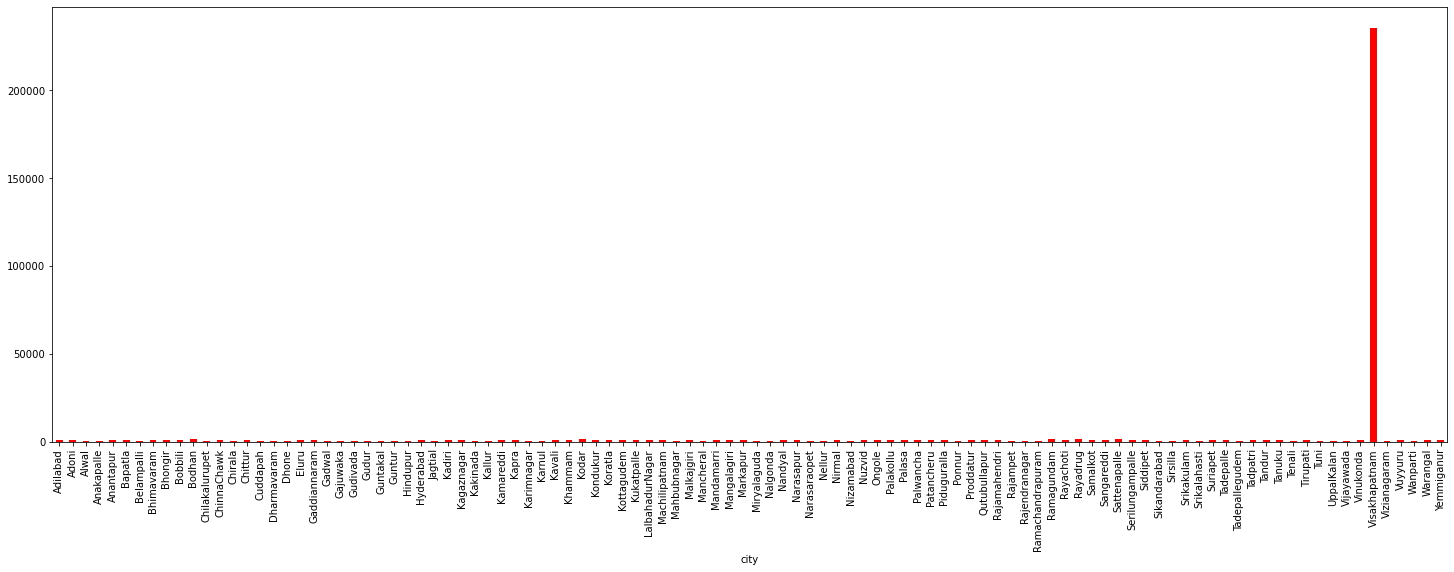

In [339]:
state_ap.groupby(['city'])['device_id'].count().plot(kind='bar', cmap='autumn', figsize =(25,8));

Text(0, 0.5, '')

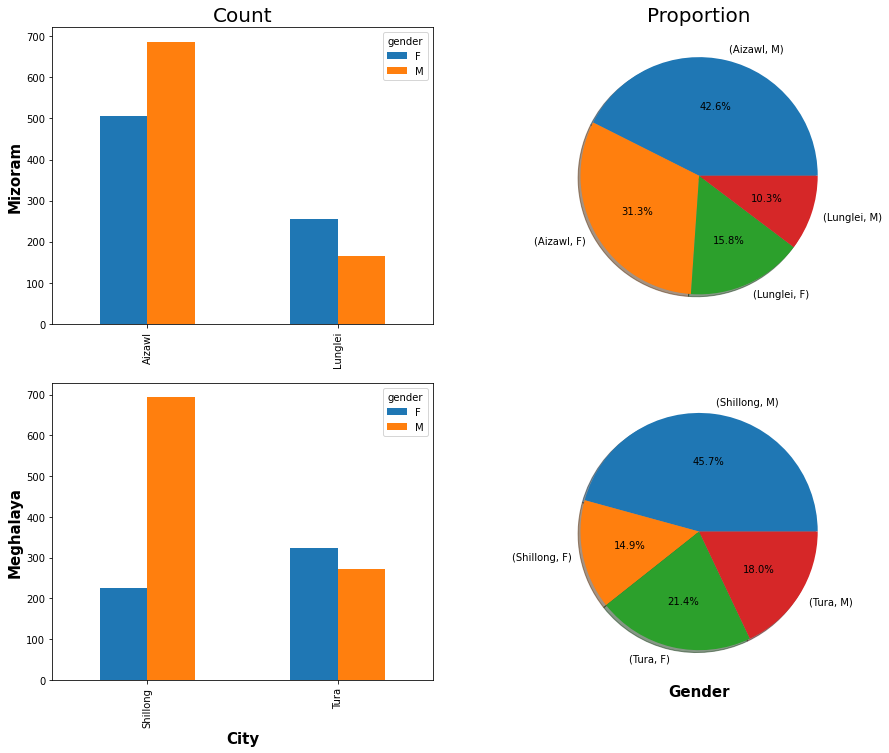

In [340]:
f,ax = plt.subplots(2,2,figsize=(15,12));
state_mz.groupby(['city','gender'])['gender'].count().unstack().plot(kind='bar',stacked=False, legend = True, ax=ax[0,0]);
state_mz.groupby(['city'])['gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],shadow=True);

state_ml.groupby(['city','gender'])['gender'].count().unstack().plot(kind='bar',stacked=False, legend = True, ax=ax[1,0]);
state_ml.groupby(['city'])['gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],shadow=True);

ax[0,0].set_title('Count', fontsize=20, );
ax[0,1].set_title('Proportion',fontsize= 20);
ax[0,0].set_xlabel('',fontweight='bold',fontsize=15)
ax[1,0].set_xlabel('City', fontweight='bold',fontsize=15)
ax[1,1].set_xlabel('Gender', fontweight='bold',fontsize=15)
ax[0,0].set_ylabel('Mizoram',fontweight='bold',fontsize=15)
ax[1,0].set_ylabel('Meghalaya', fontweight='bold',fontsize=15)
ax[0,1].set_ylabel('',fontweight='bold',fontsize=15)
ax[1,1].set_ylabel('', fontweight='bold',fontsize=15)

Text(0, 0.5, '')

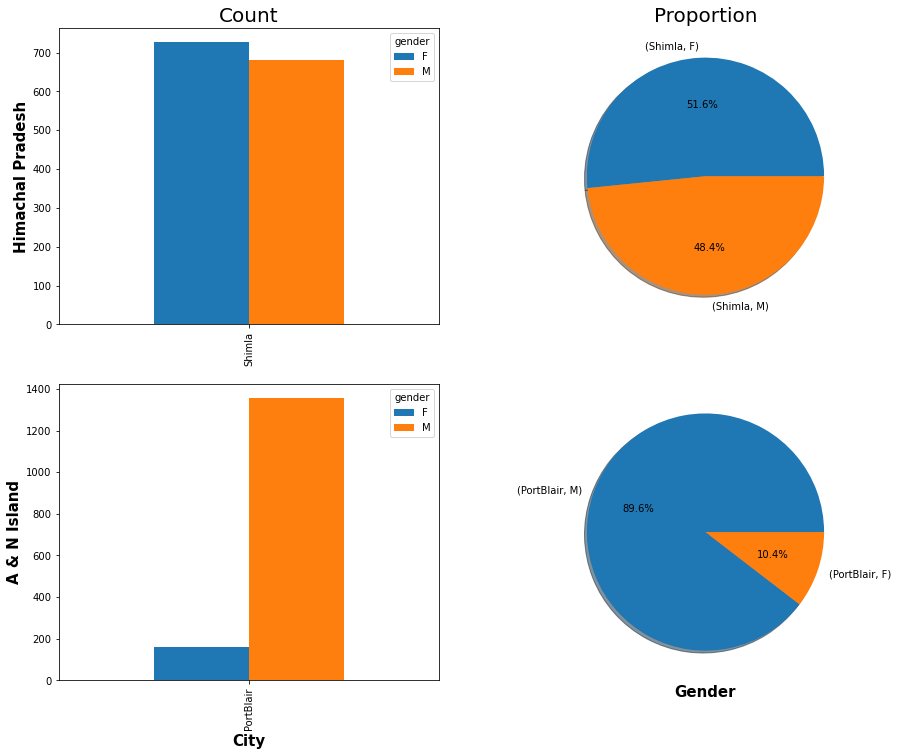

In [341]:
f,ax = plt.subplots(2,2,figsize=(15,12));
state_hp.groupby(['city','gender'])['gender'].count().unstack().plot(kind='bar',stacked=False, legend = True, ax=ax[0,0]);
state_hp.groupby(['city'])['gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],shadow=True);

state_an.groupby(['city','gender'])['gender'].count().unstack().plot(kind='bar',stacked=False, legend = True, ax=ax[1,0]);
state_an.groupby(['city'])['gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],shadow=True);

ax[0,0].set_title('Count', fontsize=20, );
ax[0,1].set_title('Proportion',fontsize= 20);
ax[0,0].set_xlabel('',fontweight='bold',fontsize=15)
ax[1,0].set_xlabel('City', fontweight='bold',fontsize=15)
ax[1,1].set_xlabel('Gender', fontweight='bold',fontsize=15)
ax[0,0].set_ylabel('Himachal Pradesh',fontweight='bold',fontsize=15)
ax[1,0].set_ylabel('A & N Island', fontweight='bold',fontsize=15)
ax[0,1].set_ylabel('',fontweight='bold',fontsize=15)
ax[1,1].set_ylabel('', fontweight='bold',fontsize=15)

Text(0, 0.5, '')

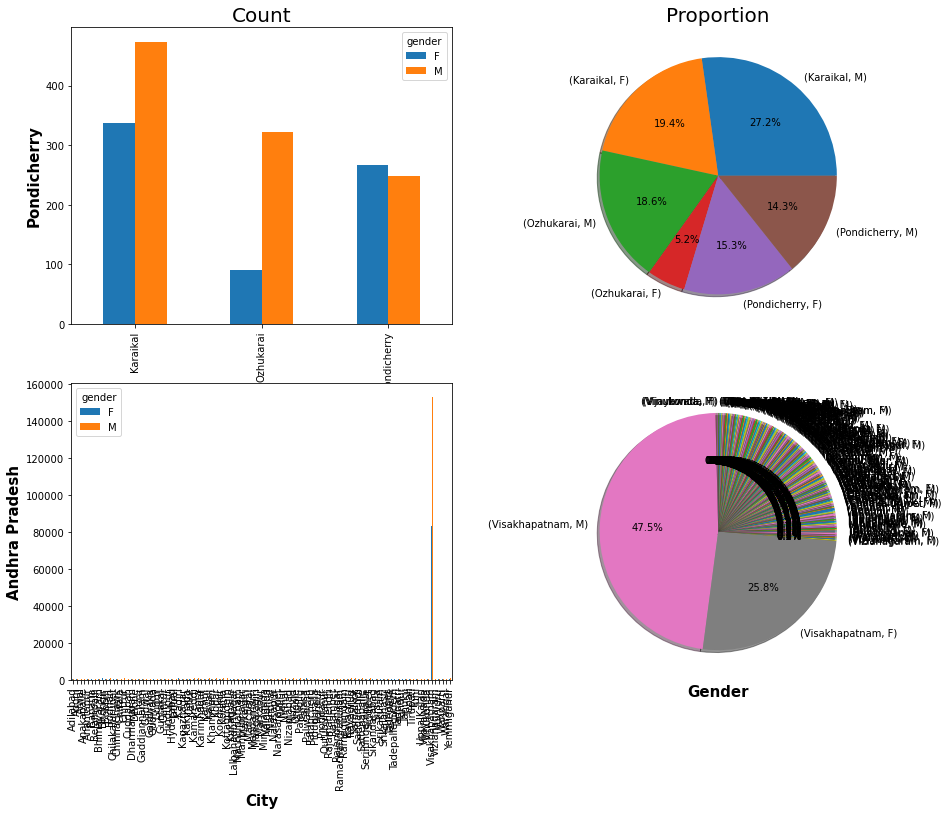

In [342]:
f,ax = plt.subplots(2,2,figsize=(15,12));
state_py.groupby(['city','gender'])['gender'].count().unstack().plot(kind='bar',stacked=False, legend = True, ax=ax[0,0]);
state_py.groupby(['city'])['gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],shadow=True);

state_ap.groupby(['city','gender'])['gender'].count().unstack().plot(kind='bar',stacked=False, legend = True, ax=ax[1,0]);
state_ap.groupby(['city'])['gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],shadow=True);

ax[0,0].set_title('Count', fontsize=20, );
ax[0,1].set_title('Proportion',fontsize= 20);
ax[0,0].set_xlabel('',fontweight='bold',fontsize=15)
ax[1,0].set_xlabel('City', fontweight='bold',fontsize=15)
ax[1,1].set_xlabel('Gender', fontweight='bold',fontsize=15)
ax[0,0].set_ylabel('Pondicherry',fontweight='bold',fontsize=15)
ax[1,0].set_ylabel('Andhra Pradesh', fontweight='bold',fontsize=15)
ax[0,1].set_ylabel('',fontweight='bold',fontsize=15)
ax[1,1].set_ylabel('', fontweight='bold',fontsize=15)

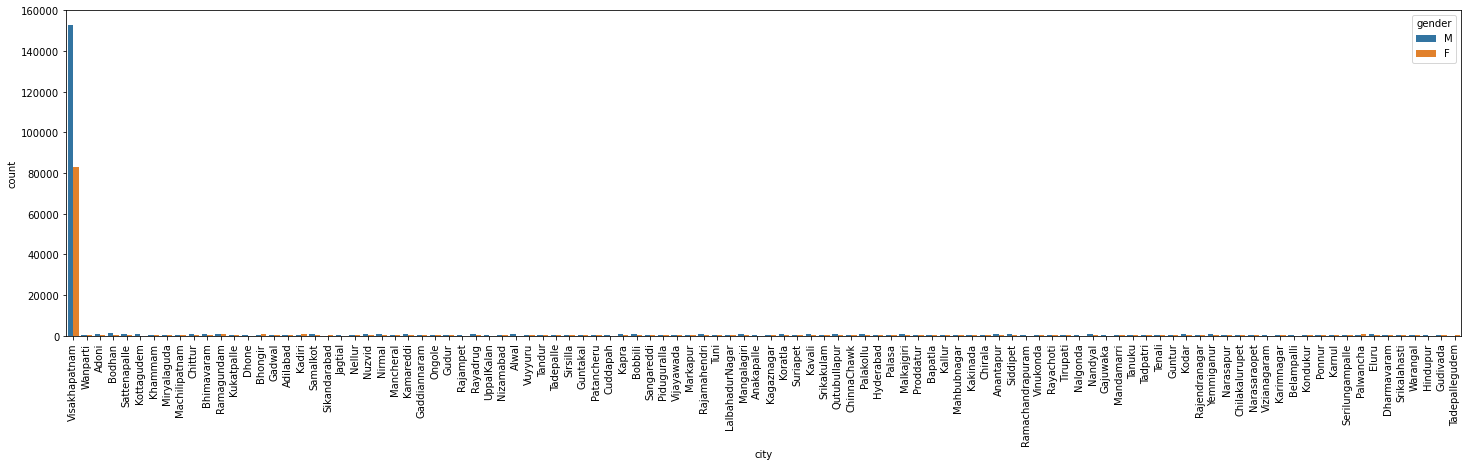

In [344]:
fig, ax = plt.subplots(figsize=(25,6))
sns.countplot(data = state_ap, x = 'city', hue='gender');
ax.tick_params(axis = 'x', rotation = 90)

In [346]:
state_ap['city'].nunique()

104

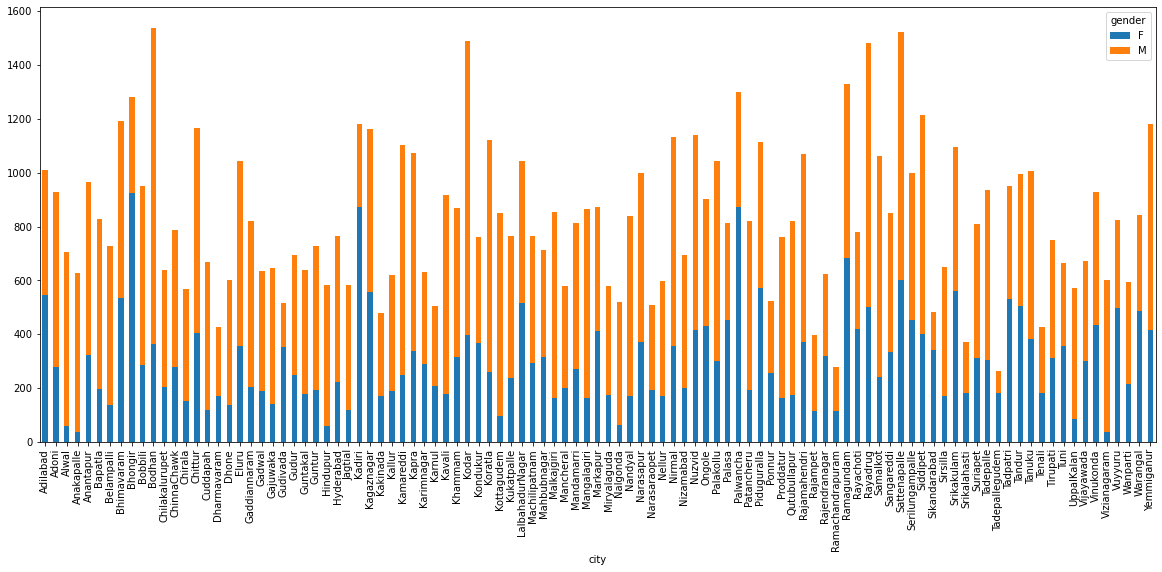

In [347]:
# AP cities less Visakhapatanam
cityname = state_ap[ state_ap['city'] =='Visakhapatnam' ].index
state_ap1 = state_ap.drop(cityname)
state_ap1.groupby(['city','gender'])['gender'].count().sort_values(ascending=False).unstack().plot(kind='bar',stacked=True, legend = True, figsize= (20,8));

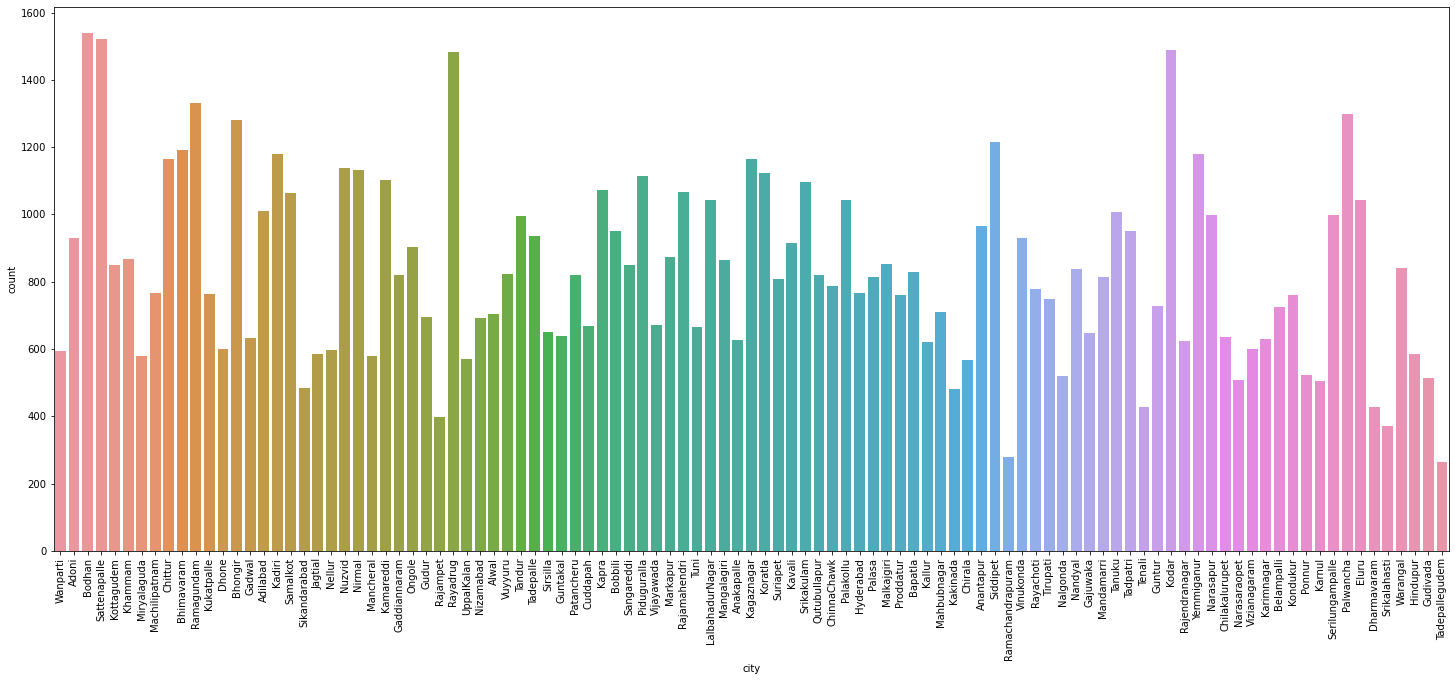

In [348]:
fig, ax = plt.subplots(figsize=(25,10))
sns.countplot(data = state_ap1, x = 'city');
ax.tick_params(axis = 'x', rotation = 90)

#### Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).

In [349]:
data_s['brand'].nunique()

69

<AxesSubplot:>

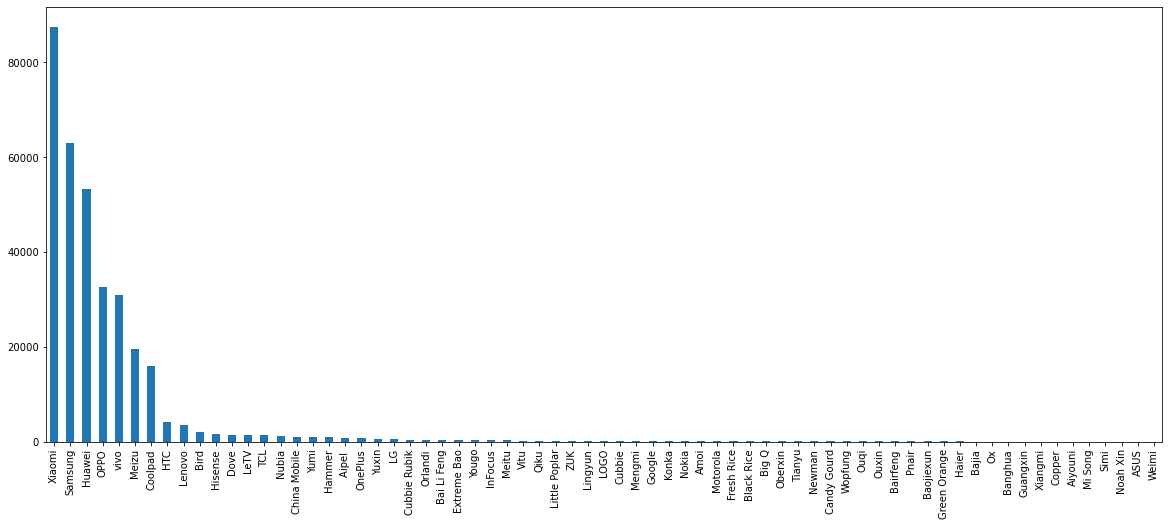

In [350]:
data_s['brand'].value_counts().plot(kind='bar', figsize=(20,8))                          

In [351]:
data_s[data_s['brand']=='Bird'].count()

event_id     1949
device_id    1949
timestamp    1949
longitude    1949
latitude     1949
city         1949
state        1949
gender       1949
age          1949
age_group    1949
brand        1949
dtype: int64

In [355]:
data_s.groupby(['brand']).filter(lambda x: x.brand.count()<1900)

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,age_group,brand
44,846001,889224616390099979,2016-05-07 12:32:55,77.869444,16.329657,Gadwal,AP,M,30,20-30,Tianyu
46,99101,-4610656475369678895,2016-05-02 13:06:11,83.338531,17.805140,Visakhapatnam,AP,M,24,20-30,Yumi
56,966635,-4610656475369678895,2016-05-06 18:28:29,83.338531,17.805140,Visakhapatnam,AP,M,24,20-30,Yumi
93,2580903,7158862178936508417,2016-05-07 09:59:47,83.320945,17.762583,Visakhapatnam,AP,M,26,20-30,TCL
101,563214,-4438877178468304564,2016-05-05 22:25:38,83.351218,17.785606,Visakhapatnam,AP,M,36,30-40,Nubia
...,...,...,...,...,...,...,...,...,...,...,...
329096,451884,8904364001805059941,2016-05-02 13:07:22,78.166500,16.458415,Wanparti,AP,F,21,20-30,Hammer
329115,1442364,1290640660775989804,2016-05-07 02:04:58,83.312422,17.762425,Visakhapatnam,AP,M,48,40-50,Dove
329132,1061026,-7249100931965014532,2016-05-01 10:14:52,83.320512,17.740964,Visakhapatnam,AP,M,44,40-50,Candy Gourd
329141,1242323,3288814329767945094,2016-05-04 21:31:01,78.539708,17.422199,Kapra,AP,M,30,20-30,Bai Li Feng


In [356]:
#Remove data for less than 1900 counts
data_s.drop(data_s.groupby(['brand']).filter(lambda x: x.brand.count()<1900).index, inplace = True)

In [357]:
data_s.groupby(['brand'])['device_id'].count().sort_values(ascending=False)

brand
Xiaomi     87334
Samsung    63040
Huawei     53326
OPPO       32484
vivo       30971
Meizu      19425
Coolpad    15961
HTC         4024
Lenovo      3438
Bird        1949
Name: device_id, dtype: int64

<AxesSubplot:>

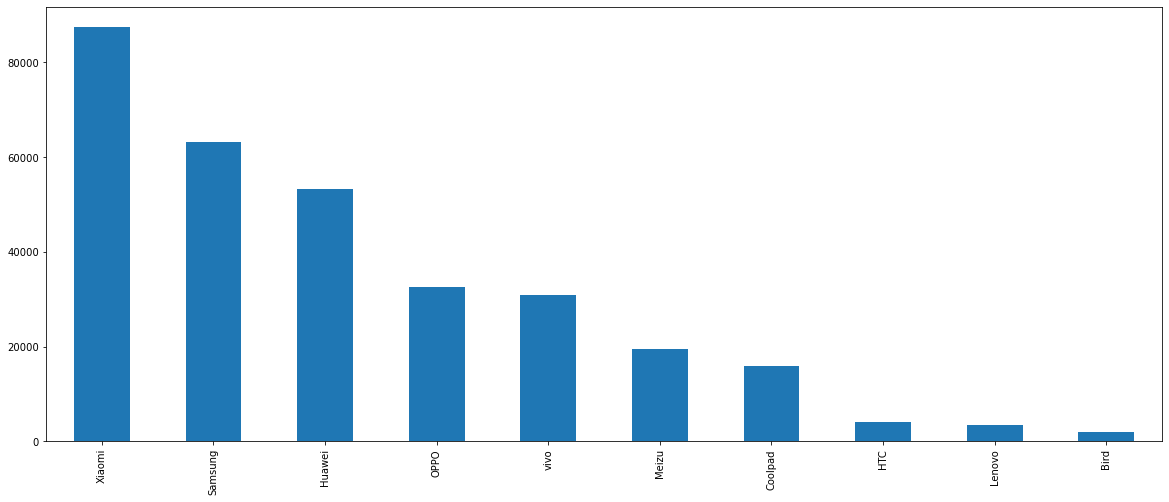

In [358]:
data_s['brand'].value_counts().plot(kind='bar', figsize=(20,8))

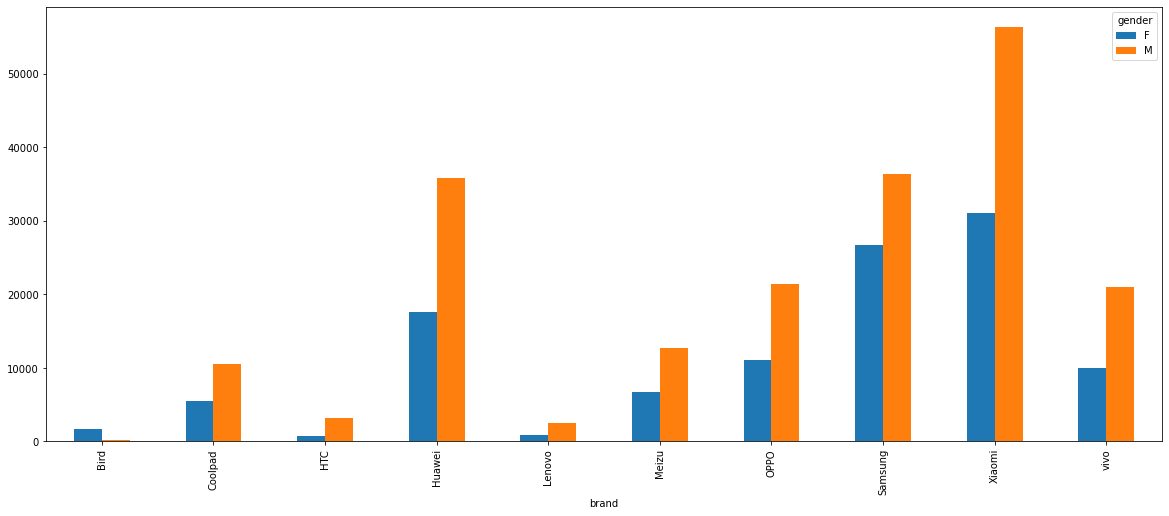

In [359]:
data_s.groupby(['brand','gender'])['gender'].count().unstack().plot(kind='bar',stacked=False, legend = True, figsize= (20,8));

Text(0, 0.5, 'Brand')

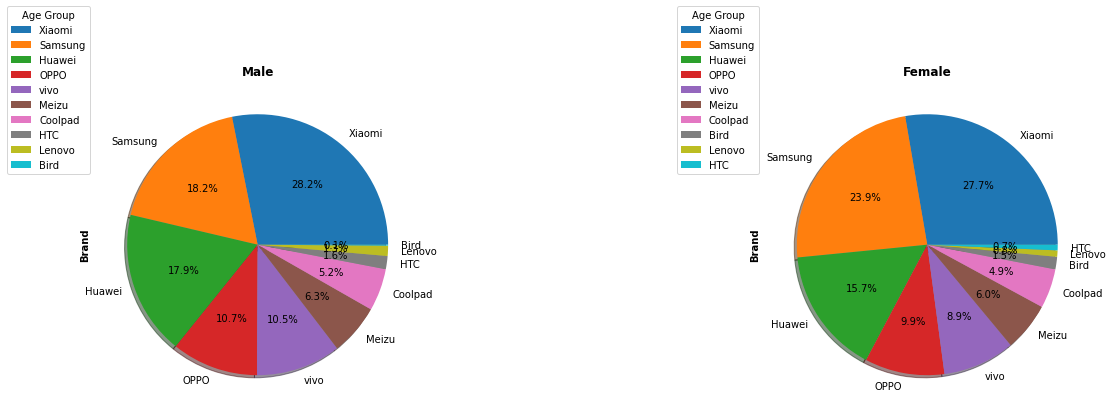

In [360]:
f,ax = plt.subplots(1,2,figsize=(22,6))
plot1 = data_s['brand'][data_s['gender']=='M'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
plot2 = data_s['brand'][data_s['gender']=='F'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Male',fontweight='bold')
ax[1].set_title('Female',fontweight='bold')

ax[0].legend(bbox_to_anchor=(0, .7),title='Age Group',loc ='lower right')
ax[1].legend(bbox_to_anchor=(0, .7),title='Age Group',loc= 'lower right')
ax[0].set_ylabel('Brand',fontweight='bold')
ax[1].set_ylabel('Brand', fontweight='bold')

Text(0, 0.5, 'Meghalaya')

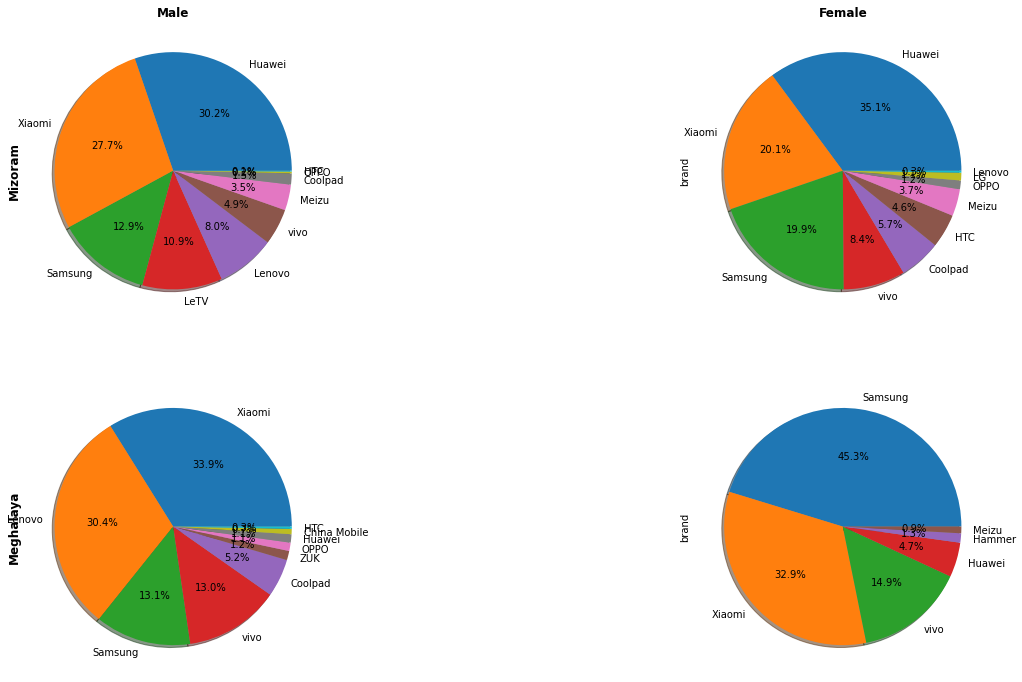

In [361]:
f,ax = plt.subplots(2,2,figsize=(22,12))
state_mz['brand'][state_mz['gender']=='M'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,0],shadow=True)
state_mz['brand'][state_mz['gender']=='F'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],shadow=True)

state_ml['brand'][state_ml['gender']=='M'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0],shadow=True)
state_ml['brand'][state_ml['gender']=='F'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],shadow=True)

ax[0,0].set_title('Male',fontweight='bold')
ax[0,1].set_title('Female',fontweight='bold')
#ax[1,0].set_title('Female',fontweight='bold')

ax[0,0].set_ylabel('Mizoram',fontweight='bold', fontsize = 12)
ax[1,0].set_ylabel('Meghalaya', fontweight='bold', fontsize = 12)

Text(0, 0.5, 'Pondycherry')

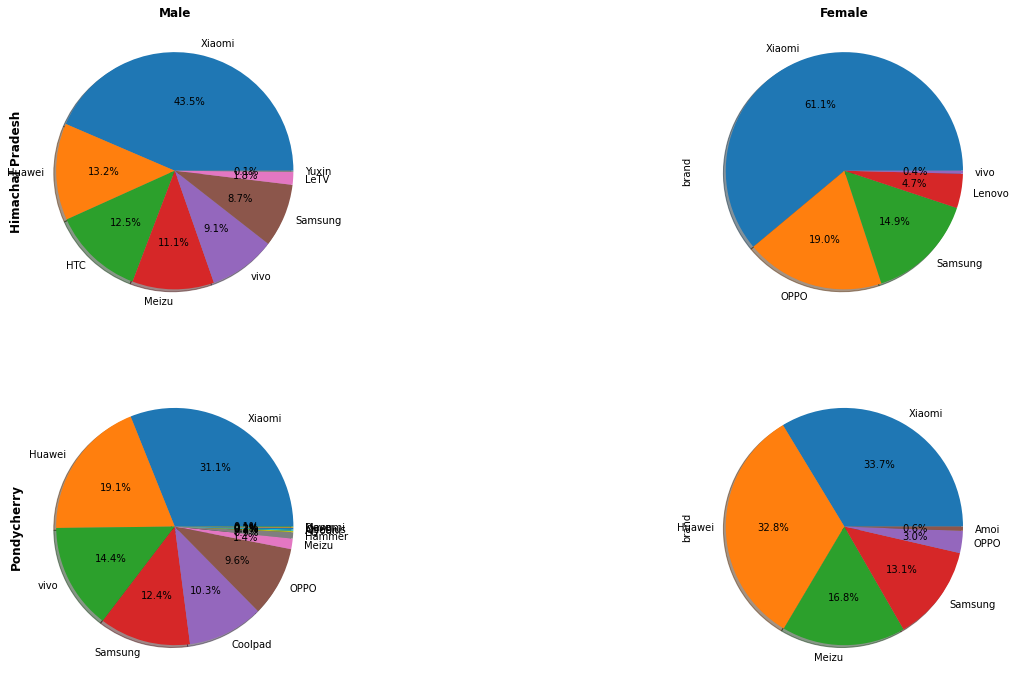

In [362]:
f,ax = plt.subplots(2,2,figsize=(22,12))
state_hp['brand'][state_hp['gender']=='M'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,0],shadow=True)
state_hp['brand'][state_hp['gender']=='F'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],shadow=True)

state_py['brand'][state_py['gender']=='M'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0],shadow=True)
state_py['brand'][state_py['gender']=='F'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],shadow=True)

ax[0,0].set_title('Male',fontweight='bold')
ax[0,1].set_title('Female',fontweight='bold')
#ax[1,0].set_title('Female',fontweight='bold')

ax[0,0].set_ylabel('Himachal Pradesh',fontweight='bold', fontsize = 12)
ax[1,0].set_ylabel('Pondycherry', fontweight='bold', fontsize = 12)

Text(0, 0.5, 'A & N Islands')

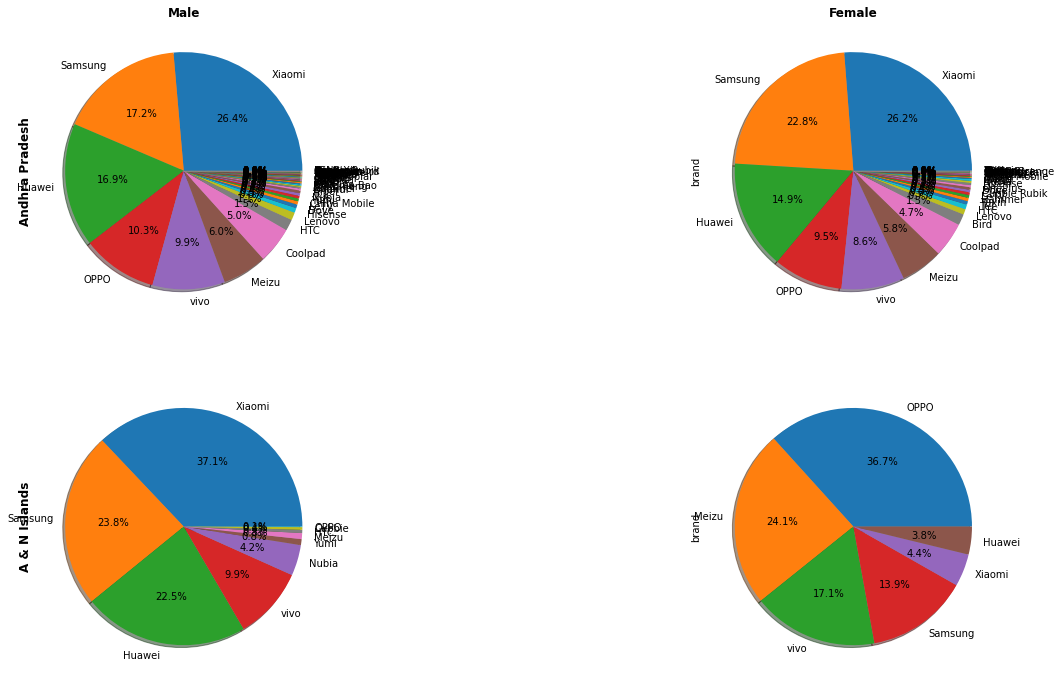

In [363]:
f,ax = plt.subplots(2,2,figsize=(22,12))
state_ap['brand'][state_ap['gender']=='M'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,0],shadow=True)
state_ap['brand'][state_ap['gender']=='F'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],shadow=True)

state_an['brand'][state_an['gender']=='M'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0],shadow=True)
state_an['brand'][state_an['gender']=='F'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],shadow=True)

ax[0,0].set_title('Male',fontweight='bold')
ax[0,1].set_title('Female',fontweight='bold')
#ax[1,0].set_title('Female',fontweight='bold')

ax[0,0].set_ylabel('Andhra Pradesh',fontweight='bold', fontsize = 12)
ax[1,0].set_ylabel('A & N Islands', fontweight='bold', fontsize = 12)

Text(0, 0.5, 'A & N Islands')

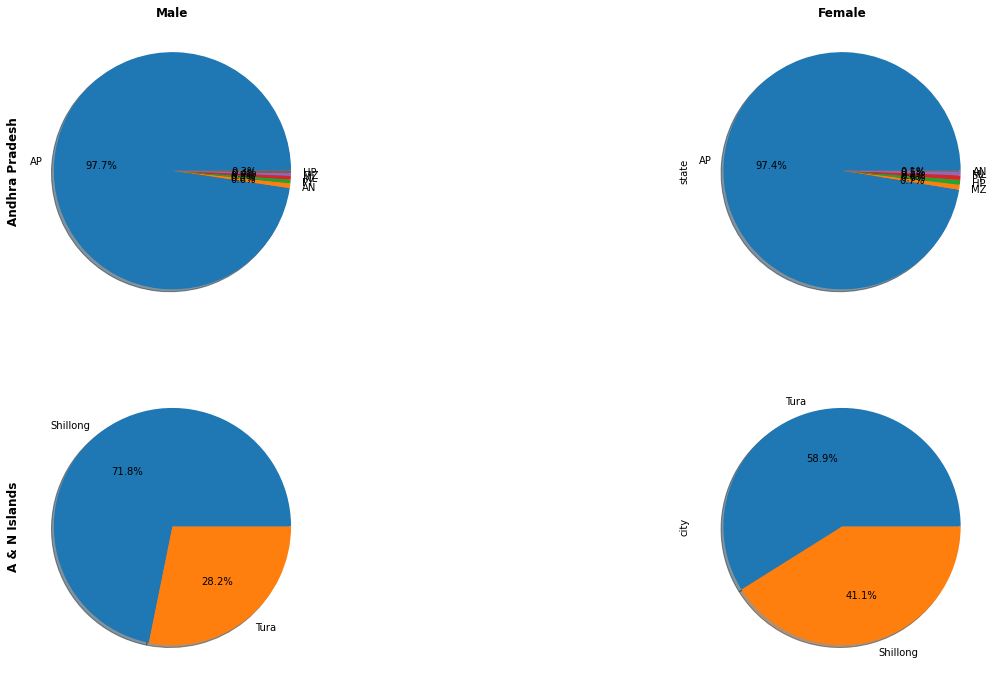

In [364]:
f,ax = plt.subplots(2,2,figsize=(22,12))
data_s['state'][data_s['gender']=='M'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,0],shadow=True)
data_s['state'][data_s['gender']=='F'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],shadow=True)

state_ml['city'][state_ml['gender']=='M'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0],shadow=True)
state_ml['city'][state_ml['gender']=='F'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],shadow=True)

ax[0,0].set_title('Male',fontweight='bold')
ax[0,1].set_title('Female',fontweight='bold')
#ax[1,0].set_title('Female',fontweight='bold')

ax[0,0].set_ylabel('Andhra Pradesh',fontweight='bold', fontsize = 12)
ax[1,0].set_ylabel('A & N Islands', fontweight='bold', fontsize = 12)